<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="Skills Network Logo">
    </a>
</p>


# **Hands-on lab: Exploratory Data Analysis - Laptops Pricing dataset**

Estimated time needed: **45** minutes

In this lab, you will use the skills acquired throughout the module, to explore the effect of different features on the price of laptops. 


# Objectives

After completing this lab you will be able to:

 - Visualize individual feature patterns
 - Run descriptive statistical analysis on the dataset
 - Use groups and pivot tables to find the effect of categorical variables on price
 - Use Pearson Correlation to measure the interdependence between variables


# Setup


For this lab, we will be using the following libraries:

* `skillsnetwork` for downloading the data
*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`scipy`](https://docs.scipy.org/doc/scipy/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for statistical operations.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.


# Install Required Libraries

You can install the required libraries by simply running the `pip install` command with a `%` sign before it. For this environment, `seaborn` library requires installation.


### Importing Required Libraries

_We recommend you import all required libraries in one place (here):_


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

# Import the dataset

You should download the modified version of the data set from the last module. 
Run the following code block to download the CSV file to this environment.


The functions below will download the dataset into your browser:


In [8]:
filepath="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"
df = pd.read_csv(filepath)

Print the first 5 entries of the dataset to confirm loading.


In [9]:
df.head(5)

,Unnamed: 0,Unnamed: 0.1,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


# Task 1 - Visualize individual feature patterns

### Continuous valued features
Generate regression plots for each of the parameters "CPU_frequency", "Screen_Size_inch" and "Weight_pounds" against "Price". Also, print the value of correlation of each feature with "Price".


(0.0, 3974.15)

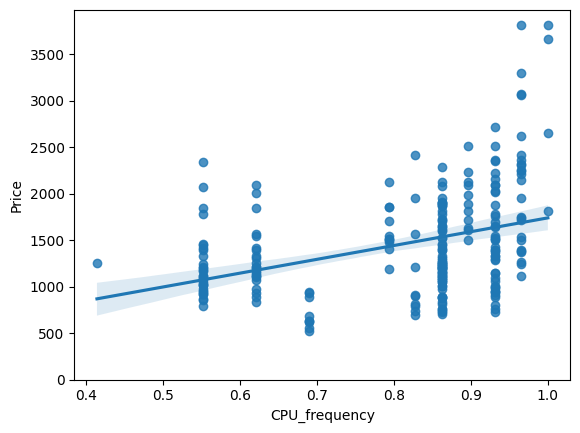

In [12]:
# Write your code below and press Shift+Enter to execute
# CPU_frequency plot
sns.regplot(data=df , x='CPU_frequency' ,y='Price')
plt.ylim(0,)

<details>
    <summary>Click here for Solution</summary>

```python
sns.regplot(x="CPU_frequency", y="Price", data=df)
plt.ylim(0,)
```

</details>


(0.0, 3974.15)

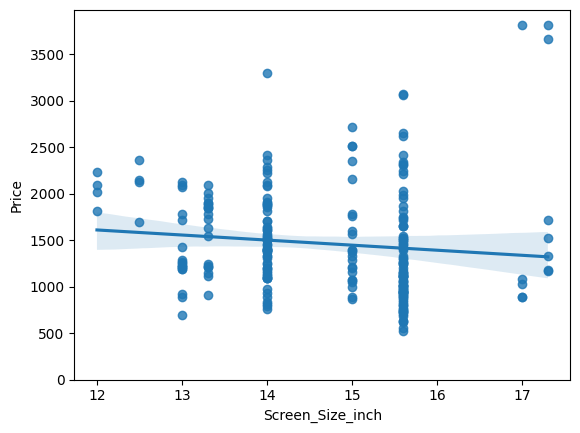

In [14]:
# Write your code below and press Shift+Enter to execute
# Screen_Size_inch plot
sns.regplot(data=df , x='Screen_Size_inch' , y='Price')
plt.ylim(0,)

<details>
    <summary>Click here for Solution</summary>

```python
sns.regplot(x="Screen_Size_inch", y="Price", data=df)
plt.ylim(0,)
```

</details>


<AxesSubplot:xlabel='Weight_pounds', ylabel='Price'>

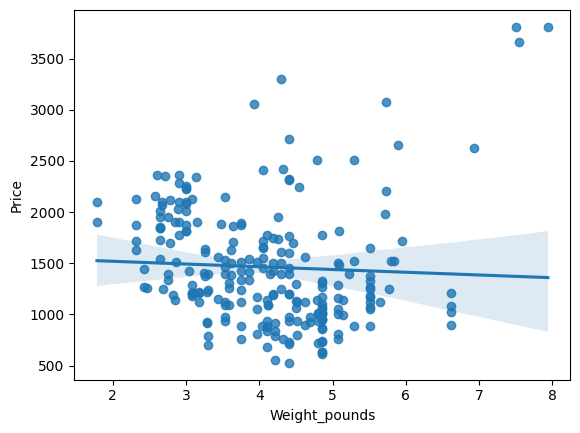

In [16]:
# Write your code below and press Shift+Enter to execute
# Weight_pounds plot
sns.regplot(data=df , x='Weight_pounds' , y='Price')

<details>
    <summary>Click here for Solution</summary>

```python
sns.regplot(x="Weight_pounds", y="Price", data=df)
plt.ylim(0,)
```

</details>


In [20]:
# Correlation values of the three attributes with Price
df[["CPU_frequency", "Screen_Size_inch","Weight_pounds" ,"Price"]].corr()


,CPU_frequency,Screen_Size_inch,Weight_pounds,Price
CPU_frequency,1.000000,-0.000948,0.066522,0.366666
Screen_Size_inch,-0.000948,1.000000,0.797534,-0.110644
Weight_pounds,0.066522,0.797534,1.000000,-0.050312
Price,0.366666,-0.110644,-0.050312,1.000000


<details>
    <summary>Click here for Solution</summary>

```python
for param in ["CPU_frequency", "Screen_Size_inch","Weight_pounds"]:
    print(f"Correlation of Price and {param} is ", df[[param,"Price"]].corr())
```

</details>


Interpretation: "CPU_frequency" has a 36% positive correlation with the price of the laptops. The other two parameters have weak correlation with price.


### Categorical features
Generate Box plots for the different feature that hold categorical values. These features would be "Category", "GPU", "OS", "CPU_core", "RAM_GB", "Storage_GB_SSD"


<AxesSubplot:xlabel='Category', ylabel='Price'>

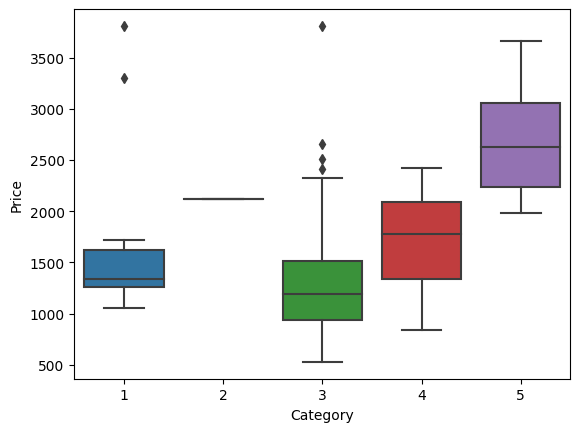

In [21]:
# Write your code below and press Shift+Enter to execute
# Category Box plot
sns.boxplot(data=df , x='Category' , y="Price")


<details>
    <summary>Click here for Solution</summary>
    
```python
sns.boxplot(x="Category", y="Price", data=df)
```

</details>


<AxesSubplot:xlabel='GPU', ylabel='Price'>

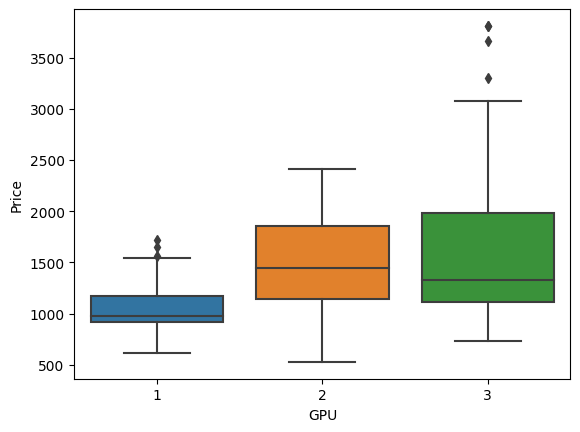

In [22]:
# Write your code below and press Shift+Enter to execute
# GPU Box plot
sns.boxplot(data=df , x='GPU' , y="Price")

<details>
    <summary>Click here for Solution</summary>
    
```python
sns.boxplot(x="GPU", y="Price", data=df)
```

</details>


<AxesSubplot:xlabel='OS', ylabel='Price'>

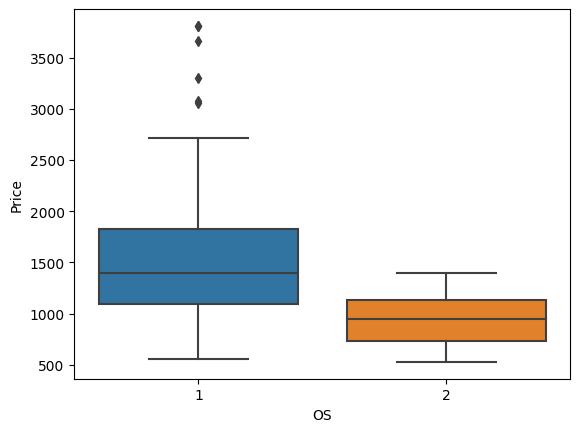

In [23]:
# Write your code below and press Shift+Enter to execute
# OS Box plot
sns.boxplot(data=df , x='OS' , y="Price")

<details>
    <summary>Click here for Solution</summary>
    
```python
sns.boxplot(x="OS", y="Price", data=df)
```

</details>


<AxesSubplot:xlabel='CPU_core', ylabel='Price'>

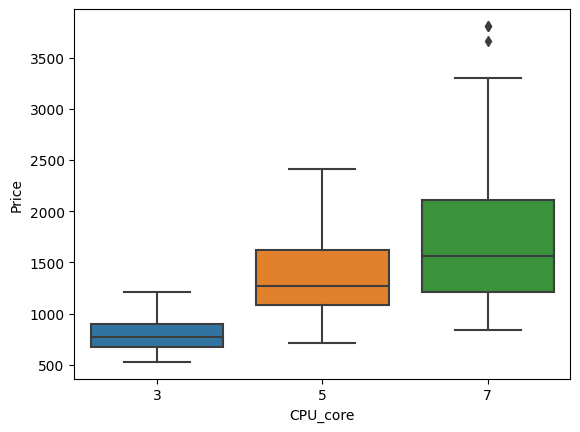

In [24]:
# Write your code below and press Shift+Enter to execute
# CPU_core Box plot
sns.boxplot(data=df , x='CPU_core' , y="Price")

<details>
    <summary>Click here for Solution</summary>
    
```python
sns.boxplot(x="CPU_core", y="Price", data=df)
```

</details>


<AxesSubplot:xlabel='RAM_GB', ylabel='Price'>

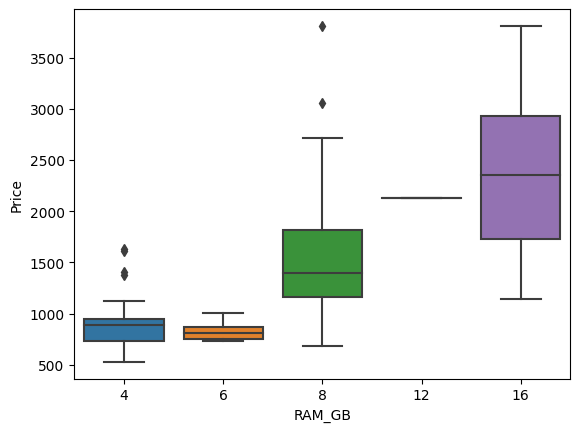

In [25]:
# Write your code below and press Shift+Enter to execute
# RAM_GB Box plot
sns.boxplot(data=df , x='RAM_GB' , y="Price")

<details>
    <summary>Click here for Solution</summary>
    
```python
sns.boxplot(x="RAM_GB", y="Price", data=df)
```

</details>


<AxesSubplot:xlabel='Storage_GB_SSD', ylabel='Price'>

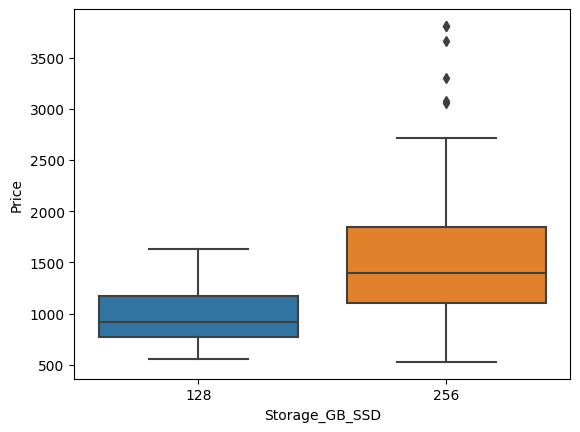

In [26]:
# Write your code below and press Shift+Enter to execute
# Storage_GB_SSD Box plot
sns.boxplot(data=df , x='Storage_GB_SSD' , y="Price")

<details>
    <summary>Click here for Solution</summary>
    
```python
sns.boxplot(x="Storage_GB_SSD", y="Price", data=df)
```

</details>


# Task 2 - Descriptive Statistical Analysis


Generate the statistical description of all the features being used in the data set. Include "object" data types as well.


In [29]:
# Write your code below and press Shift+Enter to execute
print(df.describe())
print(df.describe(include=['object']))

       Unnamed: 0  Unnamed: 0.1    Category         GPU          OS  \
count  238.000000    238.000000  238.000000  238.000000  238.000000   
mean   118.500000    118.500000    3.205882    2.151261    1.058824   
std     68.848868     68.848868    0.776533    0.638282    0.235790   
min      0.000000      0.000000    1.000000    1.000000    1.000000   
25%     59.250000     59.250000    3.000000    2.000000    1.000000   
50%    118.500000    118.500000    3.000000    2.000000    1.000000   
75%    177.750000    177.750000    4.000000    3.000000    1.000000   
max    237.000000    237.000000    5.000000    3.000000    2.000000   

         CPU_core  Screen_Size_inch  CPU_frequency      RAM_GB  \
count  238.000000        238.000000     238.000000  238.000000   
mean     5.630252         14.688655       0.813822    7.882353   
std      1.241787          1.166045       0.141860    2.482603   
min      3.000000         12.000000       0.413793    4.000000   
25%      5.000000         14.0

<details>
<summary>Click here for Solution</summary>

```python
print(df.describe())
print(df.describe(include=['object']))
```

</details>


# Task 3 - GroupBy and Pivot Tables

Group the parameters "GPU", "CPU_core" and "Price" to make a pivot table and visualize this connection using the pcolor plot.


In [32]:
# Write your code below and press Shift+Enter to execute
# Create the group
df_group=df[['GPU' , "CPU_core" , "Price"]]
grouped1=df_group.groupby(['GPU' , 'CPU_core'] , as_index=False).mean()
grouped1

,GPU,CPU_core,Price
0,1,3,769.250000
1,1,5,998.500000
2,1,7,1167.941176
3,2,3,785.076923
4,2,5,1462.197674
5,2,7,1744.621622
6,3,3,784.000000
7,3,5,1220.680000
8,3,7,1945.097561


<details>
<summary>Click here for Solution</summary>

```python
df_gptest = df[['GPU','CPU_core','Price']]
grouped_test1 = df_gptest.groupby(['GPU','CPU_core'],as_index=False).mean()
print(grouped_test1)
```

</details>


In [34]:
# Write your code below and press Shift+Enter to execute
# Create the Pivot table
df_pivot=grouped1.pivot(index='GPU' , columns="CPU_core" )
df_pivot

Price                          
CPU_core           3            5            7
GPU                                           
1         769.250000   998.500000  1167.941176
2         785.076923  1462.197674  1744.621622
3         784.000000  1220.680000  1945.097561

<details>
<summary>Click here for Solution</summary>

```python
grouped_pivot = grouped_test1.pivot(index='GPU',columns='CPU_core')
print(grouped_pivot)
```

</details>


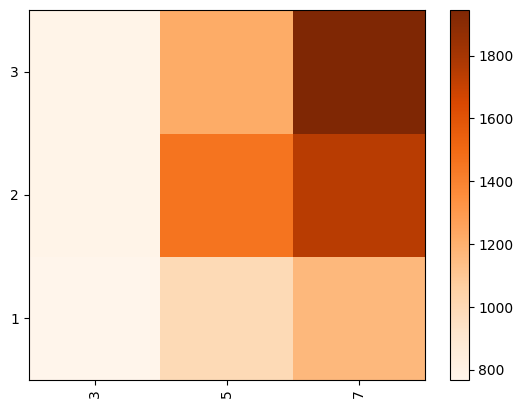

In [35]:
# Write your code below and press Shift+Enter to execute
# Create the Plot
fig, ax = plt.subplots()
im = ax.pcolor(df_pivot, cmap='Oranges')

#label names
row_labels = df_pivot.columns.levels[1]
col_labels = df_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(df_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(df_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

<details>
<summary>Click here for Solution</summary>

```python
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

fig.colorbar(im)
```

</details>


# Task 4 - Pearson Correlation and p-values

Use the `scipy.stats.pearsonr()` function to evaluate the Pearson Coefficient and the p-values for each parameter tested above. This will help you determine the parameters most likely to have a strong effect on the price of the laptops.


In [36]:
# Write your code below and press Shift+Enter to execute
for param in ['RAM_GB','CPU_frequency','Storage_GB_SSD','Screen_Size_inch','Weight_pounds','CPU_core','OS','GPU','Category']:
    pearson_coef, p_value = stats.pearsonr(df[param], df['Price'])
    print(param)
    print("The Pearson Correlation Coefficient for ",param," is", pearson_coef, " with a P-value of P =", p_value)


RAM_GB
The Pearson Correlation Coefficient for  RAM_GB  is 0.5492972971857841  with a P-value of P = 3.6815606288438424e-20
CPU_frequency
The Pearson Correlation Coefficient for  CPU_frequency  is 0.36666555892588615  with a P-value of P = 5.5024633507147195e-09
Storage_GB_SSD
The Pearson Correlation Coefficient for  Storage_GB_SSD  is 0.24342075521810297  with a P-value of P = 0.00014898923191727792
Screen_Size_inch
The Pearson Correlation Coefficient for  Screen_Size_inch  is -0.1106442081711827  with a P-value of P = 0.08853397846832801
Weight_pounds
The Pearson Correlation Coefficient for  Weight_pounds  is -0.05031225837751552  with a P-value of P = 0.4397693853434994
CPU_core
The Pearson Correlation Coefficient for  CPU_core  is 0.4593977773355117  with a P-value of P = 7.912950127010863e-14
OS
The Pearson Correlation Coefficient for  OS  is -0.22172980114827395  with a P-value of P = 0.0005696642559248114
GPU
The Pearson Correlation Coefficient for  GPU  is 0.2882981988881427  w

<details>
<summary>Click here for Solution</summary>

```python
for param in ['RAM_GB','CPU_frequency','Storage_GB_SSD','Screen_Size_inch','Weight_pounds','CPU_core','OS','GPU','Category']:
    pearson_coef, p_value = stats.pearsonr(df[param], df['Price'])
    print(param)
    print("The Pearson Correlation Coefficient for ",param," is", pearson_coef, " with a P-value of P =", p_value)
```

</details>


# Congratulations! You have completed the lab


## Authors


[Abhishek Gagneja](https://www.coursera.org/instructor/~129186572)

[Vicky Kuo](https://author.skills.network/instructors/vicky_kuo)


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-09-15|0.1|Abhishek Gagneja|Initial Version Created|
|2023-09-18|0.2|Vicky Kuo|Reviewed and Revised|


Copyright © 2023 IBM Corporation. All rights reserved.
